In [1]:
import pandas as pd
import numpy as np
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn import svm
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
customers = pd.read_excel('Dataset/Dataset.xlsx',
                          sheet_name=0,
                          header=0,
                          index_col=False,
                          keep_default_na=True)

In [3]:
customers.head()

,Month,WeekOfMonth,DayOfWeek,Make,AccidentArea,DayOfWeekClaimed,MonthClaimed,WeekOfMonthClaimed,Sex,MaritalStatus,...,AgeOfPolicyHolder,PoliceReportFiled,WitnessPresent,AgentType,NumberOfSuppliments,AddressChange_Claim,NumberOfCars,Year,BasePolicy,ClaimSize
0,Dec,5,Wednesday,Honda,Urban,Tuesday,Jan,1,Female,Single,...,26 to 30,No,No,External,none,1 year,3 to 4,1994,Liability,55526.069421
1,Jan,3,Wednesday,Honda,Urban,Monday,Jan,4,Male,Single,...,31 to 35,Yes,No,External,none,no change,1 vehicle,1994,Collision,59294.455571
2,Oct,5,Friday,Honda,Urban,Thursday,Nov,2,Male,Married,...,41 to 50,No,No,External,none,no change,1 vehicle,1994,Collision,71756.941320
3,Jun,2,Saturday,Toyota,Rural,Friday,Jul,1,Male,Married,...,51 to 65,Yes,No,External,more than 5,no change,1 vehicle,1994,Liability,7584.153493
4,Feb,1,Saturday,Honda,Urban,Monday,Feb,3,Male,Married,...,36 to 40,No,No,External,1 to 2,no change,1 vehicle,1994,Collision,98545.374339


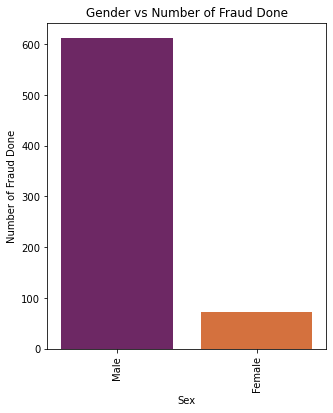

Percentage of Female Fraud Done from Female Insurance Policy Holder 4.06 %
Percentage of Male Fraud Done from Male Insurance Policy Holder 6.27 %


In [7]:
plt.subplots(figsize=(5, 6))
sns.countplot(x='Sex',
              data=customers[customers['FraudFound_P']==1],
              palette='inferno',
              order=customers['Sex'].value_counts().index)

plt.xticks(rotation=90)

plt.ylabel('Number of Fraud Done')
plt.title('Gender vs Number of Fraud Done')

plt.show()

print('Percentage of Female Fraud Done from Female Insurance Policy Holder', format((73/1797)*100, '.2f'), '%')
print('Percentage of Male Fraud Done from Male Insurance Policy Holder', format((612/9767)*100, '.2f'), '%')

# Age of policy holder

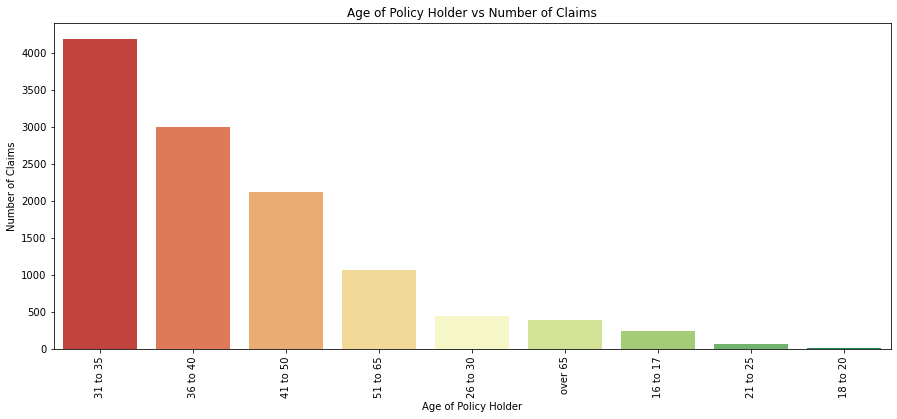

,Age Group,Claims,Percentage-%
0,31 to 35,4199,36.31
1,36 to 40,3008,26.01
2,41 to 50,2122,18.35
3,51 to 65,1070,9.25
4,26 to 30,445,3.85
5,over 65,388,3.35
6,16 to 17,247,2.14
7,21 to 25,73,0.63
8,18 to 20,13,0.11


In [8]:
plt.subplots(figsize=(15, 6))
sns.countplot(x='AgeOfPolicyHolder',
              data=customers,
              palette='RdYlGn',
              order=customers['AgeOfPolicyHolder'].value_counts().index)

plt.xticks(rotation=90)

plt.ylabel('Number of Claims')
plt.xlabel('Age of Policy Holder')
plt.title('Age of Policy Holder vs Number of Claims')

plt.show()

x = customers['AgeOfPolicyHolder'].value_counts().index
y = np.array(customers['AgeOfPolicyHolder'].value_counts().values)
perFraud = np.true_divide(y, y.sum()) * 100
claim_array = []

for i in range(len(perFraud)):
    small_claim = []
    small_claim.append(x[i])
    small_claim.append(y[i])
    small_claim.append(format(perFraud[i], '.2f'))
    #print(x[i], format(perFraud[i], '.2f'), '%')
    claim_array.append(small_claim)
    
pd.DataFrame(claim_array, columns=['Age Group', 'Claims', 'Percentage-%'])

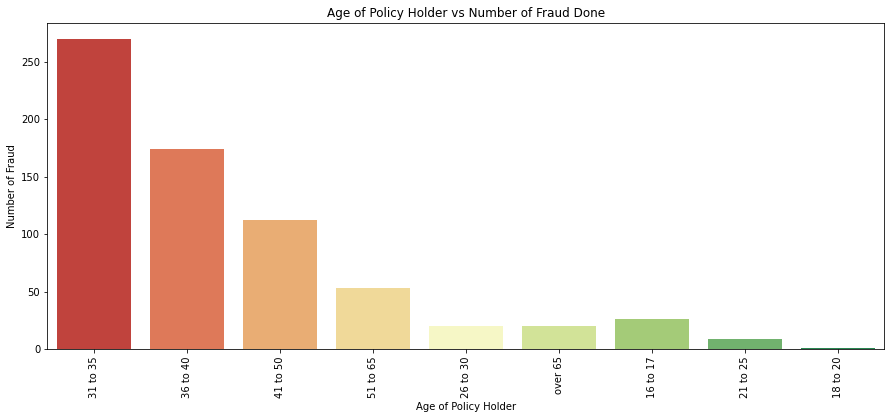

,Age Group,Claims,Percentage-%
0,31 to 35,270,39.42
1,36 to 40,174,25.40
2,41 to 50,112,16.35
3,51 to 65,53,7.74
4,16 to 17,26,3.80
5,over 65,20,2.92
6,26 to 30,20,2.92
7,21 to 25,9,1.31
8,18 to 20,1,0.15


In [9]:
plt.subplots(figsize=(15,6))
sns.countplot(x='AgeOfPolicyHolder',
              data=customers[customers['FraudFound_P']==1],
              palette='RdYlGn',
              order=customers['AgeOfPolicyHolder'].value_counts().index)

plt.xticks(rotation=90)

plt.ylabel('Number of Fraud')
plt.xlabel('Age of Policy Holder')
plt.title('Age of Policy Holder vs Number of Fraud Done')

plt.show()

x = customers[customers['FraudFound_P']==1]['AgeOfPolicyHolder'].value_counts().index
y = np.array(customers[customers['FraudFound_P']==1]['AgeOfPolicyHolder'].value_counts().values)
perFraud = np.true_divide(y, y.sum()) * 100
claim_array = []

for i in range(len(perFraud)):
    small_claim = []
    small_claim.append(x[i])
    small_claim.append(y[i])
    small_claim.append(format(perFraud[i], '.2f'))
    #print(x[i], format(perFraud[i], '.2f'), '%')
    claim_array.append(small_claim)
    
pd.DataFrame(claim_array,columns = ['Age Group', 'Claims', 'Percentage-%'])    

# From above two graph we get that poilcy holder have age greater than 50 year have low chance of doing fraud.

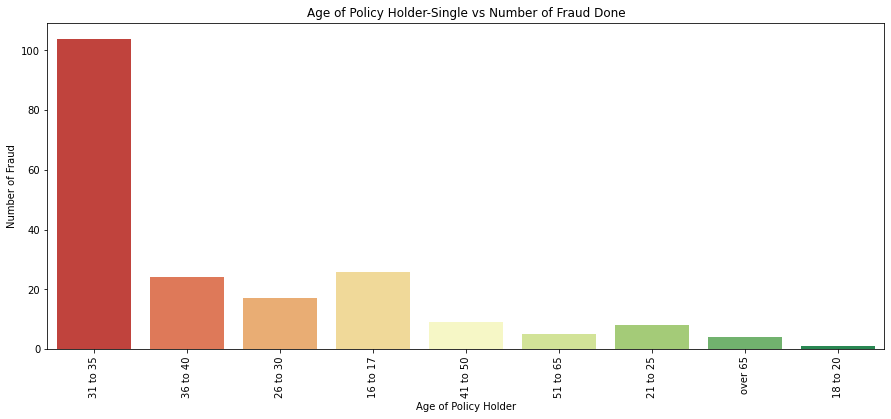

,Age Group,Claims,Percentage-%
0,31 to 35,104,52.53
1,16 to 17,26,13.13
2,36 to 40,24,12.12
3,26 to 30,17,8.59
4,41 to 50,9,4.55
5,21 to 25,8,4.04
6,51 to 65,5,2.53
7,over 65,4,2.02
8,18 to 20,1,0.51


In [10]:
plt.subplots(figsize=(15, 6))
single = customers[customers['MaritalStatus']=='Single']
sns.countplot(x='AgeOfPolicyHolder',
              data=single[single['FraudFound_P']==1],
              palette='RdYlGn',
              order=single['AgeOfPolicyHolder'].value_counts().index)

plt.xticks(rotation=90)

plt.ylabel('Number of Fraud')
plt.xlabel('Age of Policy Holder')
plt.title('Age of Policy Holder-Single vs Number of Fraud Done')

plt.show()

x = single[single['FraudFound_P']==1]['AgeOfPolicyHolder'].value_counts().index
y = np.array(single[single['FraudFound_P']==1]['AgeOfPolicyHolder'].value_counts().values)
perFraud = np.true_divide(y, y.sum())*100
claim_array = []

for i in range(len(perFraud)):
    small_claim = []
    small_claim.append(x[i])
    small_claim.append(y[i])
    small_claim.append(format(perFraud[i], '.2f'))
    #print(x[i], format(perFraud[i], '.2f'), '%')
    claim_array.append(small_claim)
    
pd.DataFrame(claim_array, columns=['Age Group', 'Claims', 'Percentage-%'])   

## From this graph we can observe that single people having age between 31 to 35 have high chance of fraud

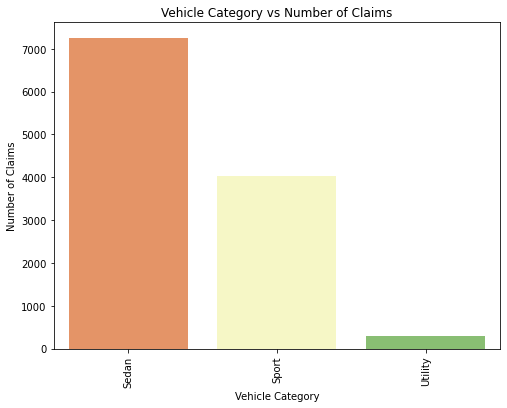

,Vehicle Category,Claims,Percentage-%
0,Sedan,7253,62.72
1,Sport,4024,34.79
2,Utility,288,2.49


In [11]:
plt.subplots(figsize=(8, 6))
sns.countplot(x='VehicleCategory',
              data=customers,
              palette='RdYlGn',
              order=customers['VehicleCategory'].value_counts().index)

plt.xticks(rotation=90)

plt.ylabel('Number of Claims')
plt.xlabel('Vehicle Category')
plt.title('Vehicle Category vs Number of Claims')

plt.show()

x = customers['VehicleCategory'].value_counts().index
y = np.array(customers['VehicleCategory'].value_counts().values)
perFraud = np.true_divide(y, y.sum()) * 100
claim_array = []

for i in range(len(perFraud)):
    small_claim = []
    small_claim.append(x[i])
    small_claim.append(y[i])
    small_claim.append(format(perFraud[i],'.2f'))
    #print(x[i], format(perFraud[i], '.2f'), '%')
    claim_array.append(small_claim)
    
pd.DataFrame(claim_array, columns=['Vehicle Category', 'Claims', 'Percentage-%'])    

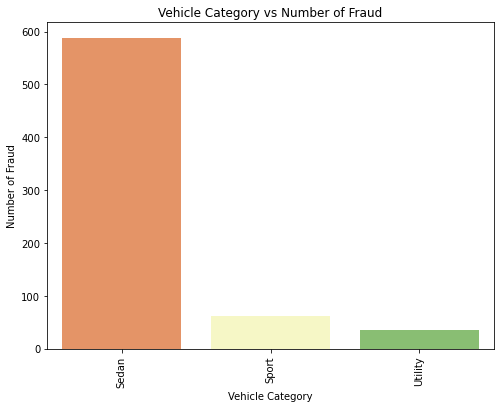

,Vehicle Category,Fraud,Percentage-%
0,Sedan,588,85.84
1,Sport,61,8.91
2,Utility,36,5.26


In [12]:
plt.subplots(figsize=(8, 6))
sns.countplot(x='VehicleCategory',
              data=customers[customers['FraudFound_P']==1],
              palette='RdYlGn',
              order=customers['VehicleCategory'].value_counts().index)

plt.xticks(rotation=90)

plt.ylabel('Number of Fraud')
plt.xlabel('Vehicle Category')
plt.title('Vehicle Category vs Number of Fraud')

plt.show()

x = customers[customers['FraudFound_P']==1]['VehicleCategory'].value_counts().index
y = np.array(customers[customers['FraudFound_P']==1]['VehicleCategory'].value_counts().values)
perFraud = np.true_divide(y, y.sum()) * 100
claim_array = []

for i in range(len(perFraud)):
    small_claim = []
    small_claim.append(x[i])
    small_claim.append(y[i])
    small_claim.append(format(perFraud[i], '.2f'))
    #print(x[i], format(perFraud[i], '.2f'), '%')
    claim_array.append(small_claim)
    
pd.DataFrame(claim_array, columns=['Vehicle Category', 'Fraud', 'Percentage-%'])   

In [ ]:
customers.columns

In [ ]:
customers['PolicyType'].value_counts()

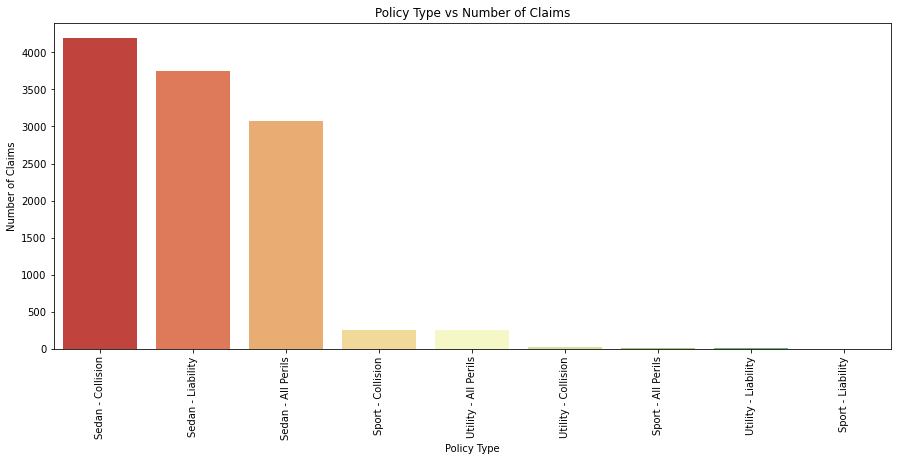

,PolicyType,Claims,Percentage-%
0,Sedan - Collision,4186,36.20
1,Sedan - Liability,3742,32.36
2,Sedan - All Perils,3067,26.52
3,Sport - Collision,262,2.27
4,Utility - All Perils,251,2.17
5,Utility - Collision,24,0.21
6,Sport - All Perils,19,0.16
7,Utility - Liability,13,0.11
8,Sport - Liability,1,0.01


In [13]:
plt.subplots(figsize=(15, 6))
sns.countplot(x='PolicyType',
              data=customers,
              palette='RdYlGn',
              order=customers['PolicyType'].value_counts().index)

plt.xticks(rotation=90)

plt.ylabel('Number of Claims')
plt.xlabel('Policy Type')
plt.title('Policy Type vs Number of Claims')

plt.show()

x = customers['PolicyType'].value_counts().index
y = np.array(customers['PolicyType'].value_counts().values)
perFraud = np.true_divide(y, y.sum()) * 100
claim_array = []

for i in range(len(perFraud)):
    small_claim = []
    small_claim.append(x[i])
    small_claim.append(y[i])
    small_claim.append(format(perFraud[i], '.2f'))
    #print(x[i], format(perFraud[i], '.2f'), '%')
    claim_array.append(small_claim)
    
pd.DataFrame(claim_array, columns=['PolicyType', 'Claims', 'Percentage-%'])   

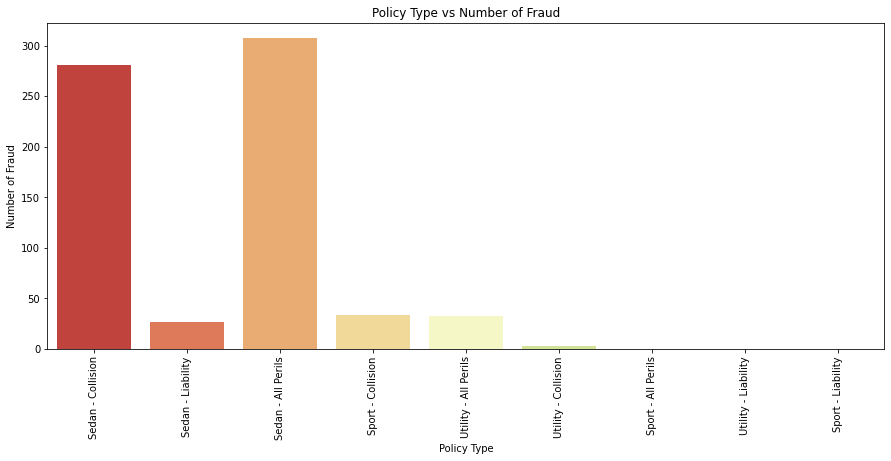

,PolicyType,Fraud,Percentage-%
0,Sedan - All Perils,307,44.82
1,Sedan - Collision,281,41.02
2,Sport - Collision,34,4.96
3,Utility - All Perils,33,4.82
4,Sedan - Liability,27,3.94
5,Utility - Collision,3,0.44


In [14]:
plt.subplots(figsize=(15, 6))
sns.countplot(x='PolicyType',
              data=customers[customers['FraudFound_P']==1],
              palette='RdYlGn',
              order=customers['PolicyType'].value_counts().index)

plt.xticks(rotation=90)

plt.ylabel('Number of Fraud')
plt.xlabel('Policy Type')
plt.title('Policy Type vs Number of Fraud')

plt.show()

x = customers[customers['FraudFound_P']==1]['PolicyType'].value_counts().index
y = np.array(customers[customers['FraudFound_P']==1]['PolicyType'].value_counts().values)
perFraud = np.true_divide(y, y.sum()) * 100
claim_array = []

for i in range(len(perFraud)):
    small_claim = []
    small_claim.append(x[i])
    small_claim.append(y[i])
    small_claim.append(format(perFraud[i], '.2f'))
    #print(x[i], format(perFraud[i], '.2f'), '%')
    claim_array.append(small_claim)
    
pd.DataFrame(claim_array, columns=['PolicyType', 'Fraud', 'Percentage-%'])   

## From this two graph we can see their more chance of fraud for people having policy type All Perlis and Car Type Sedan or Utility

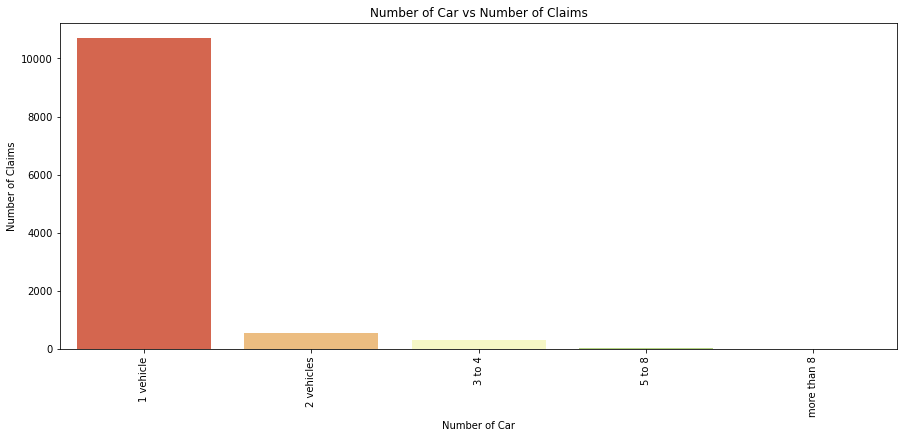

,Number of car,Claims,Percentage-%
0,1 vehicle,10698,92.50
1,2 vehicles,559,4.83
2,3 to 4,288,2.49
3,5 to 8,19,0.16
4,more than 8,1,0.01


In [15]:
plt.subplots(figsize=(15, 6))
sns.countplot(x='NumberOfCars',
              data=customers,
              palette='RdYlGn',
              order=customers['NumberOfCars'].value_counts().index)

plt.xticks(rotation=90)

plt.ylabel('Number of Claims')
plt.xlabel('Number of Car')
plt.title('Number of Car vs Number of Claims')

plt.show()

x = customers['NumberOfCars'].value_counts().index
y = np.array(customers['NumberOfCars'].value_counts().values)
perFraud = np.true_divide(y, y.sum())*100
claim_array = []

for i in range(len(perFraud)):
    small_claim = []
    small_claim.append(x[i])
    small_claim.append(y[i])
    small_claim.append(format(perFraud[i], '.2f'))
    #print(x[i], format(perFraud[i], '.2f'), '%')
    claim_array.append(small_claim)
    
pd.DataFrame(claim_array, columns=['Number of car', 'Claims', 'Percentage-%'])   

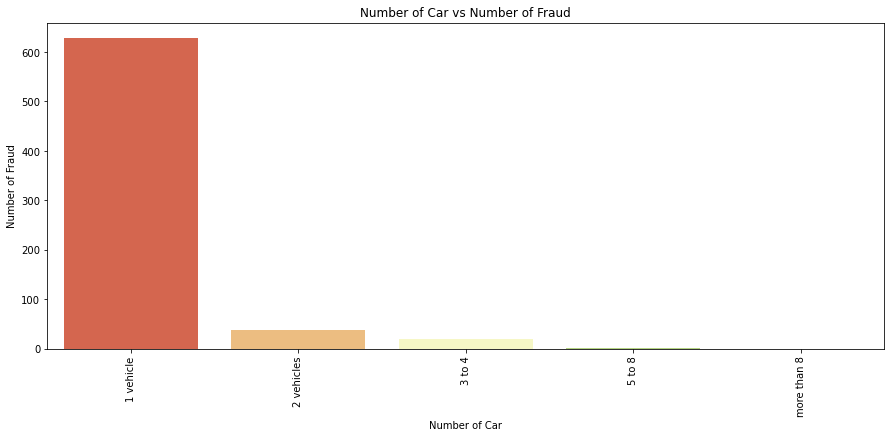

,Number of Car,Fraud,Percentage-%
0,1 vehicle,628,91.68
1,2 vehicles,37,5.40
2,3 to 4,19,2.77
3,5 to 8,1,0.15


In [16]:
plt.subplots(figsize=(15, 6))
sns.countplot(x='NumberOfCars',
              data=customers[customers['FraudFound_P']==1],
              palette='RdYlGn',
              order=customers['NumberOfCars'].value_counts().index)

plt.xticks(rotation=90)

plt.ylabel('Number of Fraud')
plt.xlabel('Number of Car')
plt.title('Number of Car vs Number of Fraud')

plt.show()

x = customers[customers['FraudFound_P']==1]['NumberOfCars'].value_counts().index
y = np.array(customers[customers['FraudFound_P']==1]['NumberOfCars'].value_counts().values)
perFraud = np.true_divide(y, y.sum()) * 100
claim_array = []

for i in range(len(perFraud)):
    small_claim = []
    small_claim.append(x[i])
    small_claim.append(y[i])
    small_claim.append(format(perFraud[i], '.2f'))
    #print(x[i], format(perFraud[i], '.2f'), '%')
    claim_array.append(small_claim)
    
pd.DataFrame(claim_array, columns=['Number of Car', 'Fraud', 'Percentage-%'])   

In [ ]:
customers[customers['FraudFound_P']==1]['PolicyType'].value_counts()

In [ ]:
plt.subplots(figsize=(15,6))
single=customers[customers['MaritalStatus']=='Single']
sns.countplot('NumberOfCars',data=single[single['FraudFound_P']==1],palette='RdYlGn',order=single['NumberOfCars'].value_counts().index)
plt.xticks(rotation=90)
plt.ylabel('Number of Fraud')
plt.xlabel('Age of Policy Holder')
plt.title('Age of Policy Holder-Single vs Number of Fraud Done')
plt.show()
x=single[single['FraudFound_P']==1]['NumberOfCars'].value_counts().index
y=np.array(single[single['FraudFound_P']==1]['NumberOfCars'].value_counts().values)
perFraud=np.true_divide(y, y.sum())*100
claim_array=[]
for i in range(len(perFraud)):
    small_claim=[]
    small_claim.append(x[i])
    small_claim.append(y[i])
    small_claim.append(format(perFraud[i],'.2f'))
    #print(x[i],format(perFraud[i],'.2f'),'%')
    claim_array.append(small_claim)
pd.DataFrame(claim_array,columns=['Age Group','Claims','Percentage-%'])    